In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Train Set and Test Set
Train = pd.read_csv("Train.txt", sep='\t',header = None, index_col=0, parse_dates=True)
Test = pd.read_csv("Test.txt", sep='\t',header = None, index_col=0, parse_dates=True)
Train.columns = ["AAL", "UAL", "OIL"]
Train.index.name = "Date"
Test.columns = ["AAL", "UAL", "OIL"]
Test.index.name = "Date"

In [3]:
Train.head()

,AAL,UAL,OIL
Date,,,
2017-11-20 14:31:00,47.20,58.03,5.981
2017-11-20 14:32:00,47.31,57.98,5.981
2017-11-20 14:33:00,47.36,57.92,5.981
2017-11-20 14:34:00,47.39,57.89,5.985
2017-11-20 14:35:00,47.43,57.94,5.990


In [4]:
Test.head()

,AAL,UAL,OIL
Date,,,
2017-11-24 17:01:00,48.665,59.680,6.355
2017-11-24 17:02:00,48.680,59.685,6.351
2017-11-24 17:03:00,48.670,59.680,6.350
2017-11-24 17:04:00,48.680,59.690,6.350
2017-11-24 17:05:00,48.710,59.680,6.350


In [5]:
Train.shape

(1320, 3)

In [6]:
Test.shape

(60, 3)

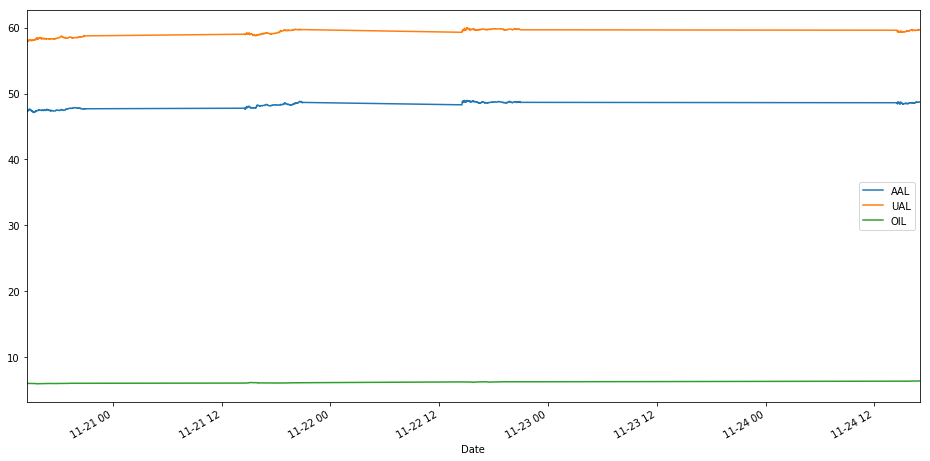

In [7]:
# Plotting Data
import seaborn as sns
Train.plot(figsize=(16,8))

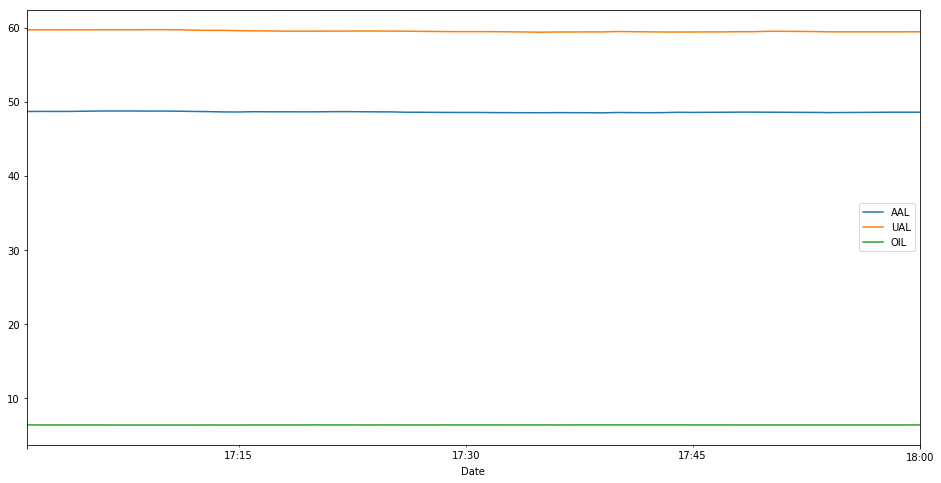

In [8]:
Test.plot(figsize = (16,8))

In [9]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled= sc.fit_transform(Train)

In [10]:
x_train = []
y_train = []
timestep = 60 # Last hour (60 Minutes)
TotalRows = Train.shape[0]
#Creating a data structure with 60 timesteps and 1 output

for i in range(timestep , TotalRows):
    x_train.append(train_set_scaled[i - timestep:i,:])
    y_train.append(train_set_scaled[i,0])

#We iterated over entire datasets, and included for each row in x_train, 60 (timestep) previous stock prices
#and in y_train the 61st stock price. The Goal is to predict timestep + 1 stock price by using timestep stock prices.
#In addition, we are adding multiple other indicator over here to better model the stock prices for American Airlines. 
#We have two additional indicators, United Airlines Stock Price and Crude Oil prices from OPEC.

In [11]:
#Reshaping x_train and y_train to numpy array format.
x_train , y_train = np.array(x_train) , np.array(y_train)

x_train = np.reshape(a = x_train, newshape =  (x_train.shape[0], x_train.shape[1], 3) )

In [12]:
import tensorflow as tf

In [13]:
#Architecture of the recurrent neural network

# Initializing the RNN
regressor = tf.keras.models.Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(tf.keras.layers.GRU(units=200, return_sequences = True, input_shape = (x_train.shape[1], 3)))
regressor.add(tf.keras.layers.Dropout(0.5))

# Adding the second GRU layer and some Dropout regularisation
regressor.add(tf.keras.layers.GRU(units=200, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.5))

# Adding the third GRU layer and some Dropout regularisation
regressor.add(tf.keras.layers.GRU(units=200, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.5))

# Adding the fourth GRU layer and some Dropout regularisation
regressor.add(tf.keras.layers.GRU(units=200, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.5))

# Adding the fifth GRU layer and some Dropout regularisation
regressor.add(tf.keras.layers.GRU(units=200, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.5))

# Adding the sixth GRU layer and some Dropout regularisation
regressor.add(tf.keras.layers.GRU(units=200))
regressor.add(tf.keras.layers.Dropout(0.5))


# Adding the output layer
regressor.add(tf.keras.layers.Dense(units=1 ))

# Compiling the RNN
regressor.compile(optimizer= 'adam', loss='mean_squared_error')

In [14]:
# Fitting the RNN to the Training Set
regressor.fit(x_train, y_train, epochs = 200, batch_size = 10)

Epoch 1/200
1260/1260 [==============================] - 39s - loss: 0.0339    
Epoch 2/200
1260/1260 [==============================] - 35s - loss: 0.0126    
Epoch 3/200
1260/1260 [==============================] - 42s - loss: 0.0088    
Epoch 4/200
1260/1260 [==============================] - 31s - loss: 0.0075    
Epoch 5/200
1260/1260 [==============================] - 61s - loss: 0.0067    
Epoch 6/200
1260/1260 [==============================] - 30s - loss: 0.0071    
Epoch 7/200
1260/1260 [==============================] - 28s - loss: 0.0065    
Epoch 8/200
1260/1260 [==============================] - 27s - loss: 0.0062    
Epoch 9/200
1260/1260 [==============================] - 28s - loss: 0.0070    
Epoch 10/200
1260/1260 [==============================] - 29s - loss: 0.0059    
Epoch 11/200
1260/1260 [==============================] - 29s - loss: 0.0062    
Epoch 12/200
1260/1260 [==============================] - 29s - loss: 0.0057    
Epoch 13/200
1260/1260 [=============

1260/1260 [==============================] - 29s - loss: 0.0020    
Epoch 103/200
1260/1260 [==============================] - 29s - loss: 0.0019    
Epoch 104/200
1260/1260 [==============================] - 29s - loss: 0.0017    
Epoch 105/200
1260/1260 [==============================] - 29s - loss: 0.0017    
Epoch 106/200
1260/1260 [==============================] - 29s - loss: 0.0018    
Epoch 107/200
1260/1260 [==============================] - 29s - loss: 0.0015    
Epoch 108/200
1260/1260 [==============================] - 29s - loss: 0.0016    
Epoch 109/200
1260/1260 [==============================] - 29s - loss: 0.0015    
Epoch 110/200
1260/1260 [==============================] - 29s - loss: 0.0018    
Epoch 111/200
1260/1260 [==============================] - 29s - loss: 0.0014    
Epoch 112/200
1260/1260 [==============================] - 29s - loss: 0.0019    
Epoch 113/200
1260/1260 [==============================] - 29s - loss: 0.0021    
Epoch 114/200
1260/1260 [=====

In [15]:
# Prediction

#We trained our model to predict stock price based upon the stock prices of the last hour
#Therefore we are going to need previous hours of stock prices for each financial hour in the test_set
#Creating a DataFrame containing American Airlines Open Stock Price from both the training and test set
Total = pd.concat((Train, Test), axis = 0)

inputs  =Total[len(Total) - len(Test) - timestep:].values
inputs = inputs.reshape(inputs.shape[0],3)
inputs = sc.transform(inputs)

x_test = []
#Creating similar data structure for test_set as we did for train_set earlier
for i in range(timestep , len(inputs)):
    x_test.append(inputs[i - timestep:i,:])
    
#Reshaping x_train and y_train to numpy array format.
x_test = np.array(x_test) 

# Need all 3 dimensions, AA previous 120 stock prices, United Stock Price, OPEC Crude Oil price
x_test = np.reshape(a = x_test, newshape = (x_test.shape[0], x_test.shape[1],3))


In [16]:
predicted_stock_price = regressor.predict(x_test)

In [17]:
Test_scaled = sc.transform(Test)
Test_scaled = pd.DataFrame(Test_scaled[:,1:])
Test_scaled.columns = ["UAL", "OIL"]
Test_scaled.index = Test.index
predicted_prices = pd.DataFrame(predicted_stock_price)
predicted_prices.columns = ["AAL"]
predicted_prices.index = Test.index

In [18]:
Prediction = pd.concat([predicted_prices, Test_scaled], axis = 1)

In [19]:
Prediction_Unscaled = sc.inverse_transform(Prediction)

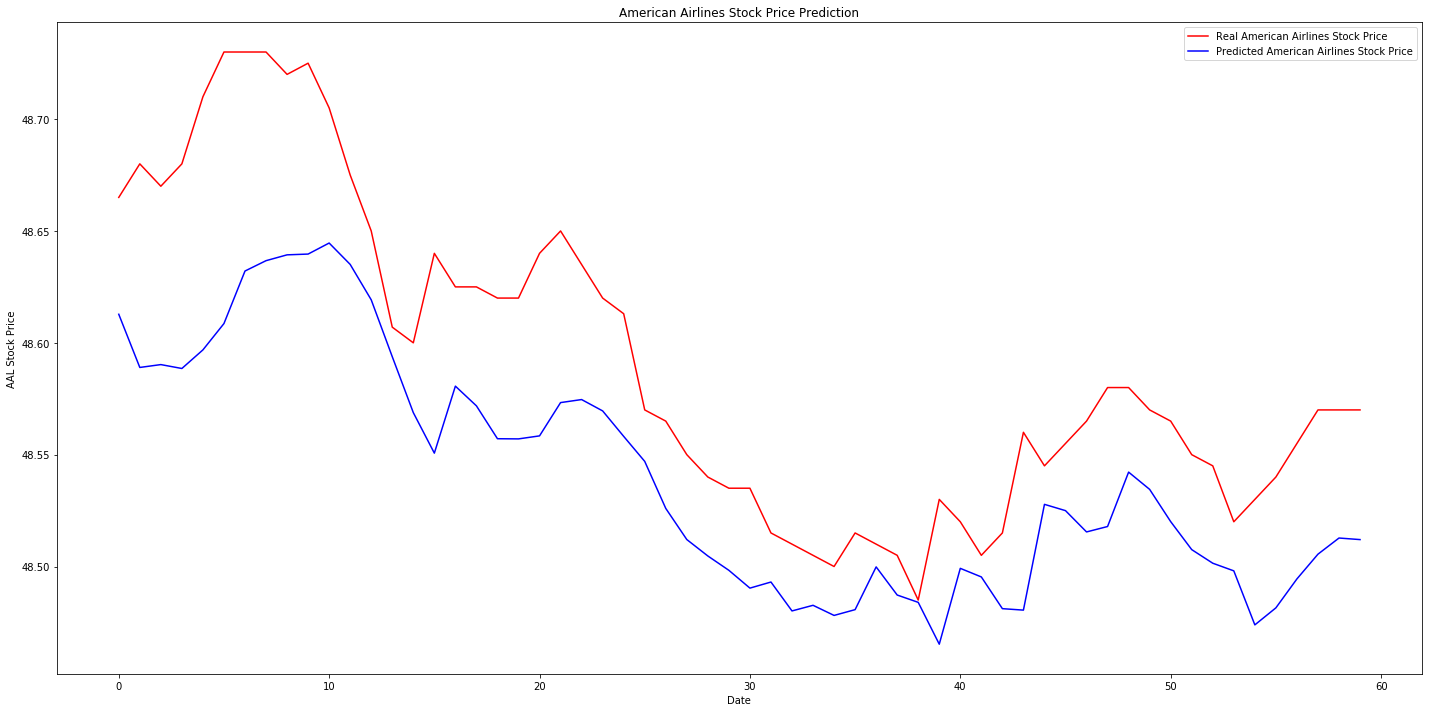

In [20]:
# Visualising the results
import seaborn as sns
plt.figure(figsize = (20,10))
plt.plot(Test['AAL'].values, color = 'red', label = 'Real American Airlines Stock Price')
plt.plot(Prediction_Unscaled[:,0], color = 'blue', label = 'Predicted American Airlines Stock Price')
plt.title('American Airlines Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('AAL Stock Price')
plt.legend()
plt.tight_layout()
plt.savefig("Result.png")
plt.show()
